In [1]:
from tqdm.notebook import tqdm
import urllib.request
import time
import requests

from bs4 import BeautifulSoup
from wordcloud import WordCloud

from konlpy.tag import Okt

import numpy as np
import pandas as pd

import platform
import matplotlib.pyplot as plt

%matplotlib inline

# wordcloud 라이브러리에서 WordCloud 클래스와 STOPWORDS 세트가져오기
from wordcloud import WordCloud, STOPWORDS

# Python 이미징 라이브러리(PIL) 가져오기
from PIL import Image

#한글 폰트 문제 해결
path = "c:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Sorry')

# 마이너스 기호가 깨지는 문제를 해결
plt.rcParams['axes.unicode_minus'] = False

# 상태 진행 바 설치
!pip show ipywidgets
!pip install ipywidgets --upgrade

Name: ipywidgets
Version: 8.1.3
Summary: Jupyter interactive widgets
Home-page: http://jupyter.org
Author: Jupyter Development Team
Author-email: jupyter@googlegroups.com
License: BSD 3-Clause License
Location: C:\Users\niceq\anaconda3\Lib\site-packages
Requires: comm, ipython, jupyterlab-widgets, traitlets, widgetsnbextension
Required-by: jupyter


In [8]:
# 페이지 하단까지 스크롤 내리기 함수
def scroll_to_bottom():
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        # 스크롤 아래로 내리기
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
        # 새로운 콘텐츠 로딩 대기
        time.sleep(1)
    
        # 새로운 스크롤 길이 계산하고 앞의 스크롤 길이와 비교하기
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 15)

In [17]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
from bs4 import BeautifulSoup

# 웹 드라이버 경로 설정
driver = webdriver.Chrome()

# 크롤링할 네이버 뉴스 기사 URL
url = "https://n.news.naver.com/article/comment/469/0000809305"
driver.get(url)

# 페이지 로딩 대기
time.sleep(3)

# BeautifulSoup 라이브러리를 사용하여 HTML 파싱을 수행
soup = BeautifulSoup(driver.page_source, 'html.parser')

# 댓글 작성자와 내용 크롤링
writers = []
comments = []

list_soup = soup.find_all('div', 'u_cbox_area')

    # 댓글 더보기 클릭 기능 추가
while True:
    try:
        more_comments = driver.find_element(By.CLASS_NAME,'u_cbox_page_more')
        more_comments.click()
        time.sleep(1)

        for item in list_soup:
            writer_tag = item.find(class_='u_cbox_nick')
            comment_tag = item.find(class_='u_cbox_contents')

            if writer_tag and comment_tag:  # 요소가 존재하는 경우에만 처리
               writer = writer_tag.get_text()
               comment = comment_tag.get_text()
               writers.append(writer)
               comments.append(comment)
    except:
        for item in list_soup:
            writer_tag = item.find(class_='u_cbox_nick')
            comment_tag = item.find(class_='u_cbox_contents')

            if writer_tag and comment_tag:  # 요소가 존재하는 경우에만 처리
               writer = writer_tag.get_text()
               comment = comment_tag.get_text()
               writers.append(writer)
               comments.append(comment)
        break

# DataFrame으로 변환 및 저장
df = pd.DataFrame({'작성자': writers, '내용': comments})
df.to_csv('comments.csv', index=False)

driver.quit()

In [28]:
writers[:5]

['gkss****', 'kmj6****', 'tnfl****', '3816****', 'szza****']

In [29]:
comments[:5]

['임영웅을 예능에서?  완전 기대',
 '임영웅   예능감도최고기대폭발  기다립니다\n보고싶어요',
 '빨리 보고싶네요 재밋겠다',
 '언제부터  방송하는지  빨리  보고 싶네요',
 '대에박! 완전완전 기대돼요 계란말이 25분완성 임영웅의 형님들과케미 생각만해도 벌써 재밌어요ㅋㅋ']

In [18]:
len(writers), len(comments)

(76, 76)

In [15]:
df.head()

작성자                                                 내용
0  gkss****                                  임영웅을 예능에서?  완전 기대
1  kmj6****                     임영웅   예능감도최고기대폭발  기다립니다\n보고싶어요
2  tnfl****                                      빨리 보고싶네요 재밋겠다
3  3816****                            언제부터  방송하는지  빨리  보고 싶네요
4  szza****  대에박! 완전완전 기대돼요 계란말이 25분완성 임영웅의 형님들과케미 생각만해도 벌써...

In [19]:
# comments.csv 파일에서 '내용' 컬럼만 불러와서 텍스트 파일로 저장
# 내용 컬럼만 가져오기
df = pd.read_csv('C:/Users/niceq/Documents/DataScience/Practice/Source_code/comments.csv',
                 header=0, usecols=["내용"])

# 텍스트 파일로 저장하기
df.to_csv('comments.txt', sep='\t')

In [22]:
# 댓글 한글 자연어 처리하기
import nltk
from konlpy.tag import Okt; o = Okt()

In [23]:
# 텍스트 파일 불러오기
f = open("C:/Users/niceq/Documents/DataScience/Practice/Source_code/comments.txt", 'r', encoding='utf-8')
data = f.read()
print(data)
f.close()

	내용
0	임영웅을 예능에서?  완전 기대
1	"임영웅   예능감도최고기대폭발  기다립니다
보고싶어요"
2	빨리 보고싶네요 재밋겠다
3	언제부터  방송하는지  빨리  보고 싶네요
4	대에박! 완전완전 기대돼요 계란말이 25분완성 임영웅의 형님들과케미 생각만해도 벌써 재밌어요ㅋㅋ
5	임영웅은 돈많이 준다거나 부른다고 그냥 출연하지않음...피디, 출연진,,내용까지 다 확인했을듯...차승원과 유해진은 안티가 없는 연예인..그리고 나영석도 이미 브랜드..
6	임영웅 삼시세끼. 출연한다니 넘 좋야요시청률. 대박나기를
7	국민스타 임영웅  삼시세끼  출연 방가방가요  본방사수 ♡♡
8	"임영웅 삼시세끼  출연 대박이네요 넘넘 좋네요
순수청년의 진솔한모습을 보게되다니
아울러 잔망미도 ㅎ
본방사수  해야죠
기대됩니다"
9	얘는좀 그만보고싶다 삼시는 호준이지!!!!!
10	난 손호준이 좋은데
11	기대합니다!!
12	시청률 대박 나오겠네요
13	pd로서 최고의 연봉을 받고 이미 돈도 많으면서 언제 짤릴지 몰라서 항상 걱정이다 라고 말하는 사람
14	영웅이는 이런 프로에 안나오는게 좋은데????????
15	임영웅 가수는 중장년의 아이돌이 아닙니다 다양한 연령대에서 사랑받는 가수죠 특정층 가수로  한정짓지 마세요
16	손호준도 출연시켜주세요
17	나 진짜 얼굴 한번 티비서 본적이 없어리메이크 곡 많이 부른 인기많은 미스터트롯 나온 사람으로만 암 ㅋㅋ 미스터 트롯 조차도 본적 없으니 이제 티비 틀다가 한번은 볼 수 있겠다 !
18	삼시세끼 즐겨보는 프로그램인데 임영웅 게스트가 나온다니 기대됩니다
19	임영웅을 예능에서?  완전 기대
20	"임영웅   예능감도최고기대폭발  기다립니다
보고싶어요"
21	빨리 보고싶네요 재밋겠다
22	언제부터  방송하는지  빨리  보고 싶네요
23	대에박! 완전완전 기대돼요 계란말이 25분완성 임영웅의 형님들과케미 생각만해도 벌써 재밌어요ㅋㅋ
24	임영웅은 돈많이 준다거나 부른다고 그냥 출연하지않음...피디, 출연진,,내용까지 다 확인했을듯...차승원

In [24]:
# 토큰화
tokens_ko = o.morphs(data)
tokens_ko

['\t',
 '내용',
 '\n',
 '0',
 '\t',
 '임영웅',
 '을',
 '예능',
 '에서',
 '?',
 '완전',
 '기대',
 '\n',
 '1',
 '\t',
 '"',
 '임영웅',
 '예능',
 '감도',
 '최고',
 '기',
 '대폭발',
 '기다립니다',
 '\n',
 '보고싶어요',
 '"',
 '\n',
 '2',
 '\t',
 '빨리',
 '보고싶네요',
 '재밋겠다',
 '\n',
 '3',
 '\t',
 '언제',
 '부터',
 '방송',
 '하는지',
 '빨리',
 '보고',
 '싶네요',
 '\n',
 '4',
 '\t',
 '대에',
 '박',
 '!',
 '완전',
 '완전',
 '기대',
 '돼요',
 '계란말이',
 '25분',
 '완성',
 '임영웅',
 '의',
 '형님',
 '들',
 '과',
 '케미',
 '생각',
 '만해',
 '도',
 '벌써',
 '재밌어요',
 'ㅋㅋ',
 '\n',
 '5',
 '\t',
 '임영웅',
 '은',
 '돈',
 '많이',
 '준다거나',
 '부른다고',
 '그냥',
 '출연',
 '하지',
 '않음',
 '...',
 '피디',
 ',',
 '출연',
 '진',
 ',,',
 '내용',
 '까지',
 '다',
 '확인',
 '했을듯',
 '...',
 '차승원',
 '과',
 '유해진',
 '은',
 '안티',
 '가',
 '없는',
 '연예인',
 '..',
 '그리고',
 '나영석',
 '도',
 '이미',
 '브랜드',
 '..',
 '\n',
 '6',
 '\t',
 '임영웅',
 '삼',
 '시세',
 '끼',
 '.',
 '출연',
 '한',
 '다니',
 '넘',
 '좋야요',
 '시청률',
 '.',
 '대박나기를',
 '\n',
 '7',
 '\t',
 '국민',
 '스타',
 '임영웅',
 '삼',
 '시세',
 '끼',
 '출연',
 '방가',
 '방가',
 '요',
 '본방',
 '사수',
 '♡♡',
 '\n',
 '8',
 '\t',
 

In [25]:
# 총 단어수와 중복을 제외한 단어수를 조회
ko = nltk.Text(tokens_ko, name='임영웅')
print(len(ko.tokens))
print(len(set(ko.tokens)))

1335
266


In [26]:
ko = nltk.Text(tokens_ko, name='임영웅')
ko.vocab().most_common(250)

[('\n', 97),
 ('\t', 77),
 ('임영웅', 36),
 ('출연', 24),
 ('기대', 16),
 ('"', 16),
 ('의', 16),
 ('도', 16),
 ('삼', 16),
 ('시세', 16),
 ('끼', 16),
 ('는', 16),
 ('이', 16),
 ('을', 12),
 ('완전', 12),
 ('은', 12),
 ('넘', 12),
 ('가수', 12),
 ('예능', 8),
 ('에서', 8),
 ('최고', 8),
 ('빨리', 8),
 ('언제', 8),
 ('보고', 8),
 ('!', 8),
 ('과', 8),
 ('ㅋㅋ', 8),
 ('돈', 8),
 ('많이', 8),
 ('...', 8),
 ('가', 8),
 ('..', 8),
 ('이미', 8),
 ('.', 8),
 ('다니', 8),
 ('시청률', 8),
 ('방가', 8),
 ('요', 8),
 ('본방', 8),
 ('사수', 8),
 ('대박', 8),
 ('수', 8),
 ('됩니다', 8),
 ('손호준', 8),
 ('좋은데', 8),
 ('사람', 8),
 ('한번', 8),
 ('티비', 8),
 ('본적', 8),
 ('미스터', 8),
 ('트롯', 8),
 ('내용', 5),
 ('?', 4),
 ('감도', 4),
 ('기', 4),
 ('대폭발', 4),
 ('기다립니다', 4),
 ('보고싶어요', 4),
 ('보고싶네요', 4),
 ('재밋겠다', 4),
 ('부터', 4),
 ('방송', 4),
 ('하는지', 4),
 ('싶네요', 4),
 ('대에', 4),
 ('박', 4),
 ('돼요', 4),
 ('계란말이', 4),
 ('25분', 4),
 ('완성', 4),
 ('형님', 4),
 ('들', 4),
 ('케미', 4),
 ('생각', 4),
 ('만해', 4),
 ('벌써', 4),
 ('재밌어요', 4),
 ('준다거나', 4),
 ('부른다고', 4),
 ('그냥', 4),
 ('하지', 4),
 

In [27]:
# 불용어처리(여러 번 수행)
stop_words = [',','#','\t','\n','"','의','도','삼','시세','끼','는','이','을','넘','에서','언제','!','과','ㅋㅋ','많이','...','가',
             '..','.','요','됩니다','?','기','부터','하는지','싶네요','대에','들','준다거나','부른다고','진',',,','까지','한','!!!!','!!']

#용어가 제거된 텍스트를 기반으로 nltk 라이브러리의 Text 객체를 생성
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='임영웅')
ko.vocab().most_common(50)

[('임영웅', 36),
 ('출연', 24),
 ('기대', 16),
 ('완전', 12),
 ('은', 12),
 ('가수', 12),
 ('예능', 8),
 ('최고', 8),
 ('빨리', 8),
 ('보고', 8),
 ('돈', 8),
 ('이미', 8),
 ('다니', 8),
 ('시청률', 8),
 ('방가', 8),
 ('본방', 8),
 ('사수', 8),
 ('대박', 8),
 ('수', 8),
 ('손호준', 8),
 ('좋은데', 8),
 ('사람', 8),
 ('한번', 8),
 ('티비', 8),
 ('본적', 8),
 ('미스터', 8),
 ('트롯', 8),
 ('내용', 5),
 ('감도', 4),
 ('대폭발', 4),
 ('기다립니다', 4),
 ('보고싶어요', 4),
 ('보고싶네요', 4),
 ('재밋겠다', 4),
 ('방송', 4),
 ('박', 4),
 ('돼요', 4),
 ('계란말이', 4),
 ('25분', 4),
 ('완성', 4),
 ('형님', 4),
 ('케미', 4),
 ('생각', 4),
 ('만해', 4),
 ('벌써', 4),
 ('재밌어요', 4),
 ('그냥', 4),
 ('하지', 4),
 ('않음', 4),
 ('피디', 4)]

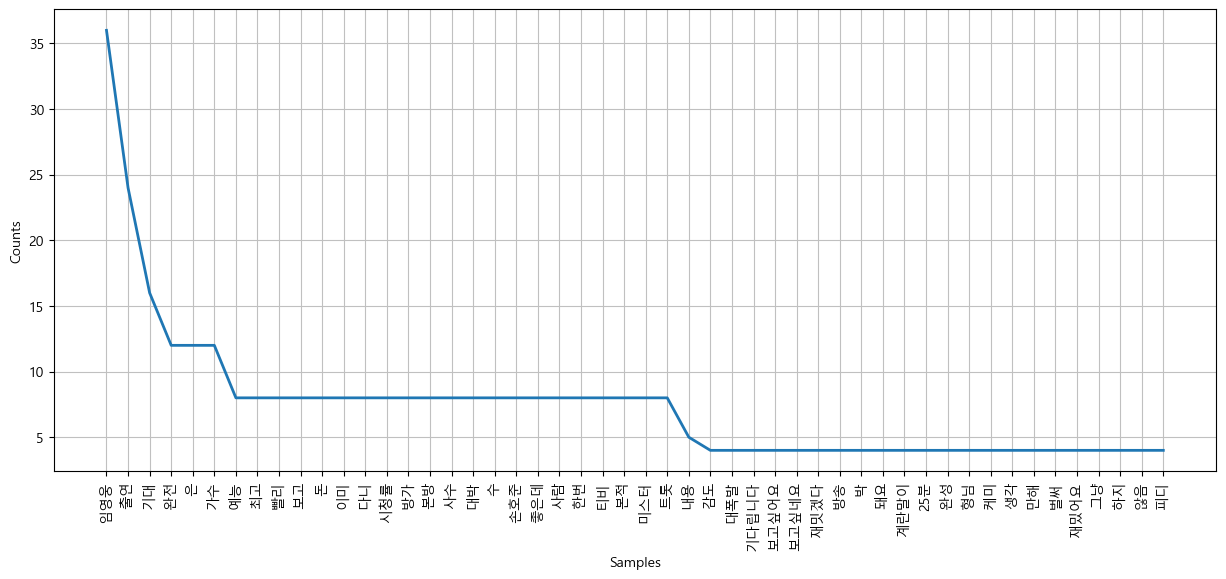

In [28]:
# 빈도수 그래프 그리기
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

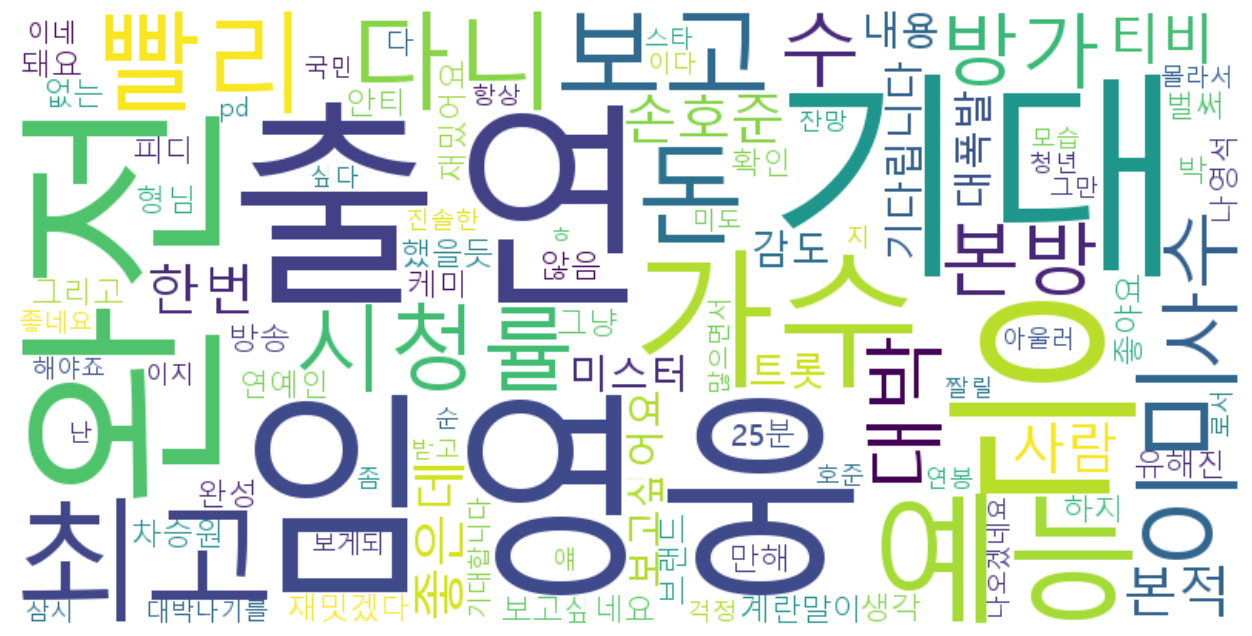

In [35]:
# 워드 클라우드
# 데이터 준비
data = ko.vocab().most_common(100)

# 워드클라우드 객체 생성 (폰트 지정)
wordcloud = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                      relative_scaling=0.5,
                      background_color='white',
                      width=800, height=400
                      )

# 텍스트 생성
text = "\n".join([f"{word}: {freq}" for word, freq in data])

# 워드클라우드 생성
wordcloud.generate(text)

# 이미지 출력
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [2]:
# 추첨 프로그램
from random import *
import pandas as pd

# 댓글 작성자 목록 담긴 csv 파일 로드
df = pd.read_csv('C:/Users/niceq/Documents/DataScience/Practice/Source_code/comments.csv', encoding='utf-8')
df.head()

작성자                                                 내용
0  gkss****                                  임영웅을 예능에서?  완전 기대
1  kmj6****                     임영웅   예능감도최고기대폭발  기다립니다\n보고싶어요
2  tnfl****                                      빨리 보고싶네요 재밋겠다
3  3816****                            언제부터  방송하는지  빨리  보고 싶네요
4  szza****  대에박! 완전완전 기대돼요 계란말이 25분완성 임영웅의 형님들과케미 생각만해도 벌써...

In [3]:
# 데이터프레임을 리스트 형태로 변환
writers_list = df.values.tolist()

In [5]:
# 순서 섞기
shuffle(writers_list)
# 아무나 1명 추출
winner = sample(writers_list, 1)

# 당첨자 출력
print('---------당첨자 발표----------')
print('당첨자 : {}'.format(winner))
print('---------축하드립니다----------')

---------당첨자 발표----------
당첨자 : [['khm7****', '영웅이는 이런 프로에 안나오는게 좋은데????????']]
---------축하드립니다----------
